In [2]:
import pandas as pd


In [3]:
df1 = pd.read_excel('/content/drive/MyDrive/data/Aracaju.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/data/Fortaleza.xlsx')
df3 = pd.read_excel('/content/drive/MyDrive/data/Natal.xlsx')
df4= pd.read_excel('/content/drive/MyDrive/data/Recife.xlsx')
df5 = pd.read_excel('/content/drive/MyDrive/data/Salvador.xlsx')


In [4]:
df = pd.concat([df1,df2,df3,df4,df5])

In [5]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [6]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [7]:
df['LojaID'] = df['LojaID'].astype("object")

In [8]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [9]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [10]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde
103,Fortaleza,2019-01-01,142.57,1002,3
73,Natal,2018-01-05,773.00,852,2
62,Fortaleza,2019-01-01,106.21,1005,6
119,Recife,2019-03-02,152.30,982,7
76,Recife,2019-01-01,17.86,980,5
133,Salvador,2019-03-02,153.71,1035,1
23,Salvador,2019-01-01,193.20,1036,3
79,Recife,2019-01-01,14.53,983,6
103,Recife,2019-01-01,41.65,982,3
101,Fortaleza,2019-01-01,11.67,1005,4


In [11]:
df.dropna(how='all', inplace=True)

In [12]:
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [13]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [14]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [15]:
df['Receita'].max()

3544.0

In [16]:
df['Receita'].min()

3.34

In [17]:
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [18]:
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [19]:
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [20]:
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


# **Trabalhando com Datas**

In [21]:
df['ano_venda'] = df['Data'].dt.year

In [22]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,ano_venda
187,Natal,2019-01-02,3.85,1035,3,11.55,3.0,2019
116,Aracaju,2018-01-01,48.44,1522,4,193.76,4.0,2018
10,Fortaleza,2019-01-01,179.88,1002,4,719.52,4.0,2019
10,Aracaju,2019-01-01,42.34,1522,6,254.04,6.0,2019
22,Fortaleza,2019-01-01,150.32,1005,1,150.32,1.0,2019


In [23]:
df['mes_venda'], df['dia_venda'] = (df['Data'].dt.month, df['Data'].dt.day)

In [24]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,ano_venda,mes_venda,dia_venda
195,Salvador,2019-01-02,44.89,1036,3,134.67,3.0,2019,1,2
125,Salvador,2019-03-02,25.00,1037,2,50.00,2.0,2019,3,2
95,Fortaleza,2019-01-01,35.28,1002,2,70.56,2.0,2019,1,1
23,Recife,2019-01-01,37.51,982,2,75.02,2.0,2019,1,1
91,Natal,2019-01-02,17.74,1035,1,17.74,1.0,2019,1,2


In [25]:
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [26]:
df['diferença_dias'] = df["Data"]- df['Data'].min()
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,ano_venda,mes_venda,dia_venda,diferença_dias
130,Fortaleza,2019-03-02,12.36,983,4,49.44,4.0,2019,3,2,425 days
67,Aracaju,2018-01-01,78.13,1521,4,312.52,4.0,2018,1,1,0 days
117,Fortaleza,2019-03-02,15.42,983,8,123.36,8.0,2019,3,2,425 days
33,Aracaju,2018-01-01,35.09,1523,4,140.36,4.0,2018,1,1,0 days
39,Fortaleza,2019-01-01,176.51,1005,1,176.51,1.0,2019,1,1,365 days


In [27]:
df['trimestre_venda'] = df['Data'].dt.quarter

In [28]:
vendas_março_19 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]

In [29]:
vendas_março_19.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,ano_venda,mes_venda,dia_venda,diferença_dias,trimestre_venda
121,Fortaleza,2019-03-02,41.55,981,3,124.65,3.0,2019,3,2,425 days,1
138,Recife,2019-03-02,150.38,983,6,902.28,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
123,Salvador,2019-03-02,127.45,1036,3,382.35,3.0,2019,3,2,425 days,1
124,Recife,2019-03-02,47.98,983,7,335.86,7.0,2019,3,2,425 days,1


In [30]:
df.groupby(df["Cidade"])["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

### **Visualização de Dados**

<Axes: >

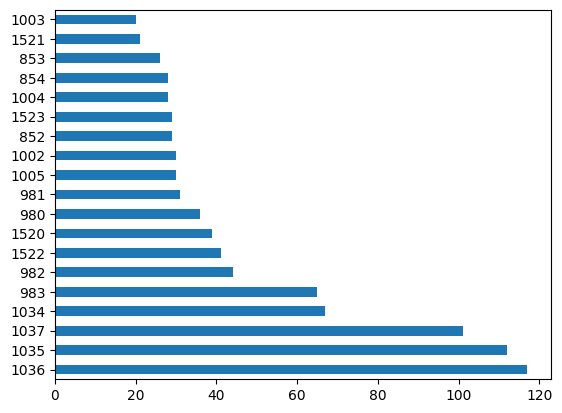

In [34]:
df['LojaID'].value_counts(ascending=False).plot.barh()

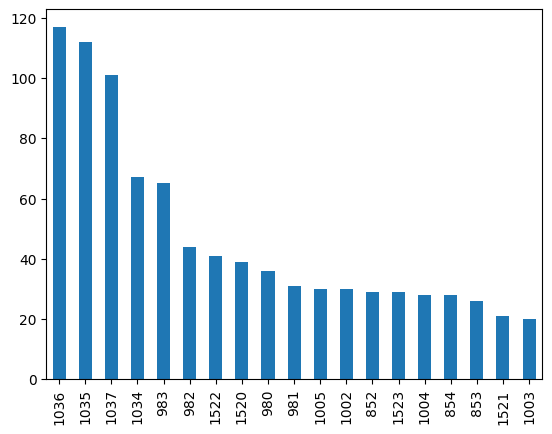

In [33]:
df['LojaID'].value_counts(ascending=False).plot.bar();

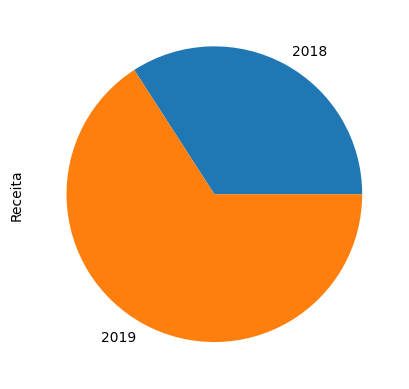

In [36]:
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

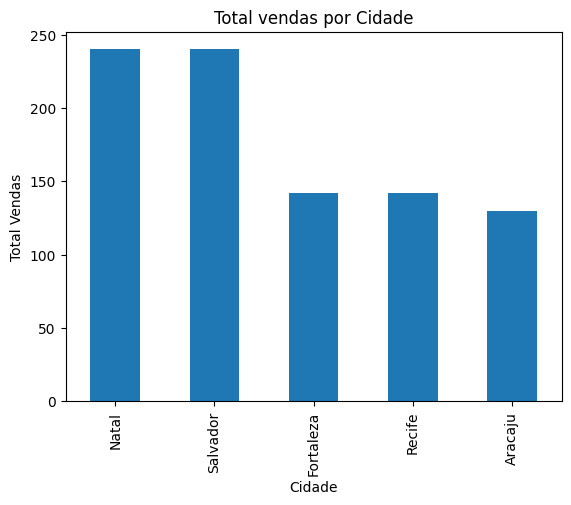

In [37]:
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [38]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

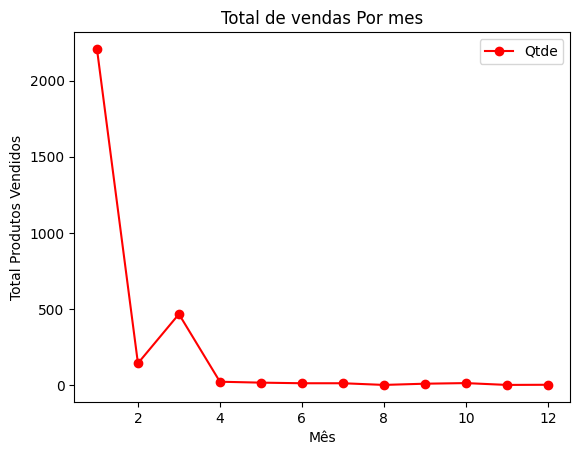

In [43]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title='Total de vendas Por mes', color='red', marker='o')
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

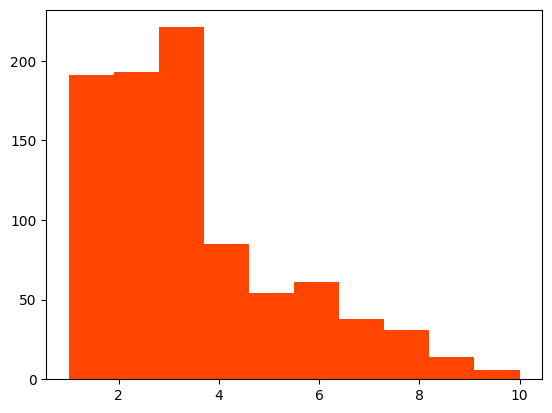

In [44]:
plt.hist(df["Qtde"], color="orangered");

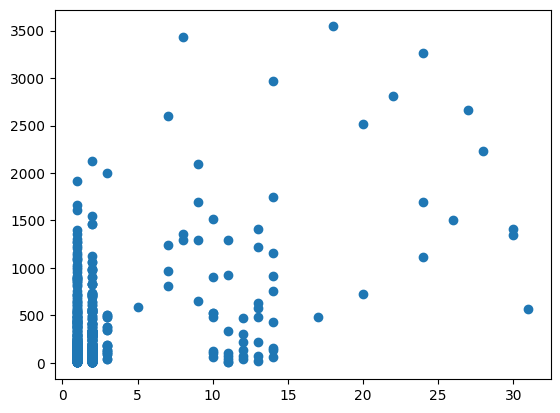

In [49]:
df_2019 = df[df["ano_venda"] == 2019]
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"]);

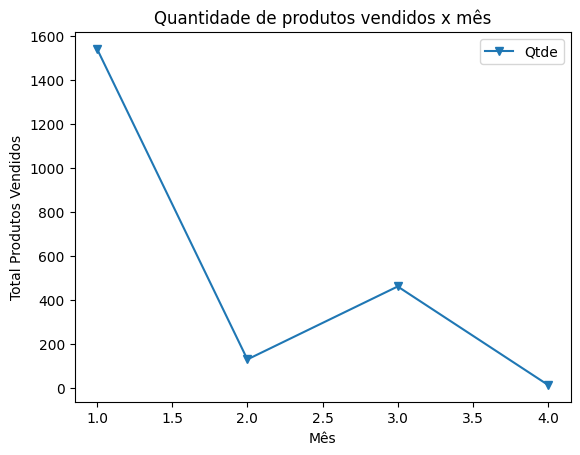

In [50]:
#Salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()
plt.savefig("grafico QTDE x MES.png")